## EXAM EXAMPLES

This notebook solves several exercises which are similar to the Qiskit developer exam exercises.

In [2]:
import qiskit
from qiskit import *
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright


## EXERCISE 1:

Which statement will create a quantum circuit with four quantum bits and four classical bits?

A. QuantumCircuit(4, 4)<br>
B. QuantumCircuit(4)<br>
C. QuantumCircuit(QuantumRegister(4, 'qr0'), QuantumRegister(4, 'cr1'))<br>
D. QuantumCircuit([4, 4])<br>

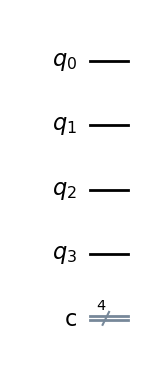

In [11]:
circuit = QuantumCircuit(4,4)
circuit.draw('mpl')

#### Answer A. is correct.
#### B. produces a circuit with four qubits and no classical registers.
#### C. produces a circuit with four qubits named qr0 and four qubits named cr1. This could be the answer if we change the second QuantumRegister() function with ClassicalRegister(4, 'cr1').
#### D. returns an error.

## EXERCISE 2:

Given this code fragment, what is the probability that a measurement would result in $|0>$ ? <br>
<br>
qc = QuantumCircuit(1)<br>
qc.ry(3 * math.pi/4, 0)<br>
<br>
A. 0.8536<br>
B. 0.5<br>
C. 0.1464<br>
D. 1.0<br>

#### Answer:
The probability of measuring $|0>$ after a y-rotation of $\frac{3\pi}{4}$ is 0.1464 since the final state is $|\psi> =   ( (\cos{(3 \pi / 4)}|0> + \sin{(3 \pi / 4)} |1> )$

Let's check it with code:

[[0.146+0.j 0.354+0.j]
 [0.354+0.j 0.854+0.j]]
!!! the 00 component of the density matrix is answer C.


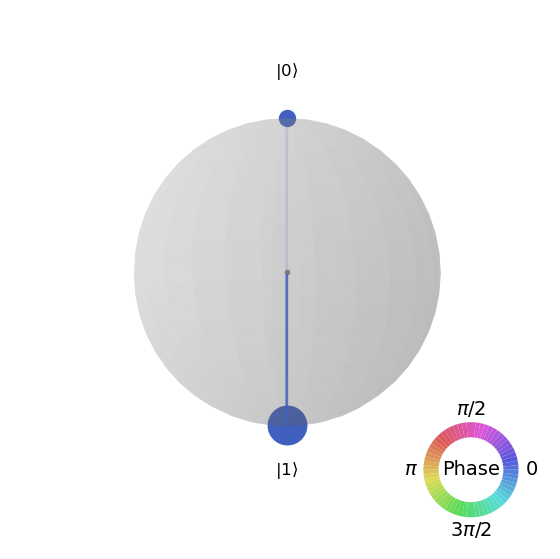

In [53]:
import math
import numpy as np
from qiskit.visualization import plot_state_qsphere, plot_bloch_multivector

qc = QuantumCircuit(1)
qasm = Aer.get_backend('aer_simulator')
qc.ry(3*math.pi/4,0)
qc.save_statevector()

#qc.draw('mpl')

qasm_job = qasm.run(circuits = qc, shots = 1000)
qc_vector = qasm_job.result().get_statevector()
qc_counts = qasm_job.result().get_counts()

# if you want to generate the density matrix by hand
qc_state = np.array([qc_vector])
qc_state = np.dot(qc_state.transpose() , qc_state)
print(np.round(qc_state, decimals = 3))
print('!!! the 00 component of the density matrix is answer C.')
plot_state_qsphere(qc_state)

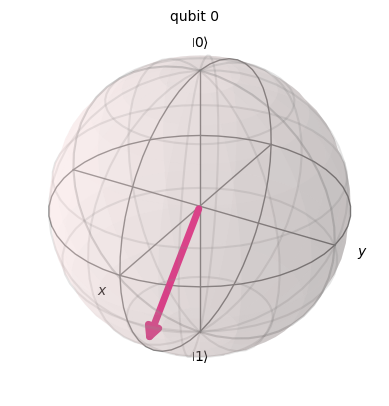

In [52]:
plot_bloch_multivector(np.array(qc_vector))

## EXERCISE 3:

Assuming the fragment below, which three code fragments would produce the circuit illustrated?

inp_reg = QuantumRegister(2, name='inp')

ancilla = QuantumRegister(1, name='anc')

qc = QuantumCircuit(inp_reg, ancilla)

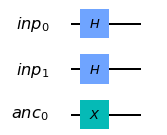

#### Possible answers:
<table table border="1" 
           align="left">
    <tr><th>A. qc.h(inp_reg) <br>
    qc.x(ancilla)<br>
    qc.draw()<br>
    <th><th>B. qc.h(inp_reg[0:2])<br>
    qc.x(ancilla[0])<br>
    qc.draw()<br>
    <th><th>C. qc.h(inp_reg[0:1])<br>
    qc.x(ancilla[0])<br>
    qc.draw()<br><tr><tr>
    <th>D. qc.h(inp_reg[0])<br>
    qc.h(inp_reg[1])<br>
    qc.x(ancilla[0])<br>
    qc.draw()<br>
    <th><th>E. qc.h(inp_reg[1])<br>
    qc.h(inp_reg[2])<br>
    qc.x(ancilla[1])<br>
    qc.draw()<br>
    <th><th>F. qc.h(inp_reg)<br>
    qc.h(inp_reg)<br>
    qc.x(ancilla)<br>
    qc.draw()<br><td><tr>
<table>

#### Correct answers: A, B, D

Answer B is not correct since inp_reg[0:1] leaves qubit inp1 with no Hadamard gate. <br>
Answer E is not correct since qc.h(inp_reg[2]) will return an error, there is no qubit inp2. <br>
Answer F is not correct since qubits inp0 and inp1 have two Hadamard gates each. <br>

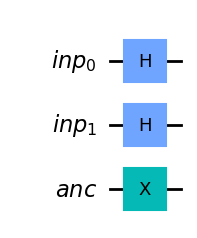

In [10]:
# This code has been done before reading the possible answers:

inp_reg = QuantumRegister(2, name='inp')
ancilla = QuantumRegister(1, name='anc')
qc = QuantumCircuit(inp_reg, ancilla)

qc.h(inp_reg)
qc.x(ancilla)

qc.draw('mpl')

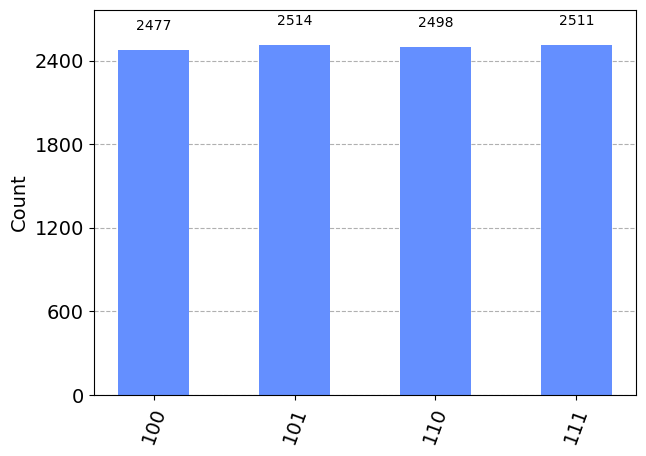

In [27]:
# As an extra, check the state resulting from this circuit.

inp_reg = QuantumRegister(2, name='inp')
ancilla = QuantumRegister(1, name='anc')
cr = ClassicalRegister(3, 'cr')
qc = QuantumCircuit(inp_reg, ancilla, cr)

qc.h(inp_reg)
qc.x(ancilla)

# Remember that in Qiskit 0.44 there is a bug that requires the initialization of 
# a backend before introducing save_statevector() in a circuit.
qasm = Aer.get_backend('aer_simulator')
qc.save_statevector()
qc.measure(inp_reg, cr[0:2])
qc.measure(ancilla, cr[2])

qasm_job = qasm.run(circuits = qc, shots = 10000)
qc_state = qasm_job.result().get_statevector()
qc_counts = qasm_job.result().get_counts()

from qiskit.visualization import plot_histogram

plot_histogram(qc_counts)

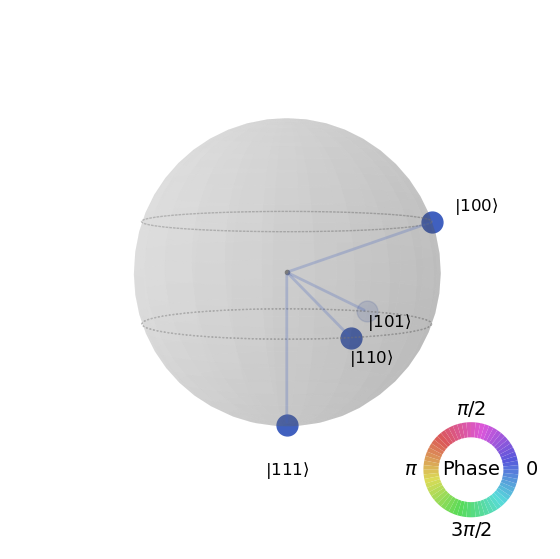

In [18]:
from qiskit.visualization import plot_state_qsphere, plot_bloch_multivector

plot_state_qsphere(qc_state)

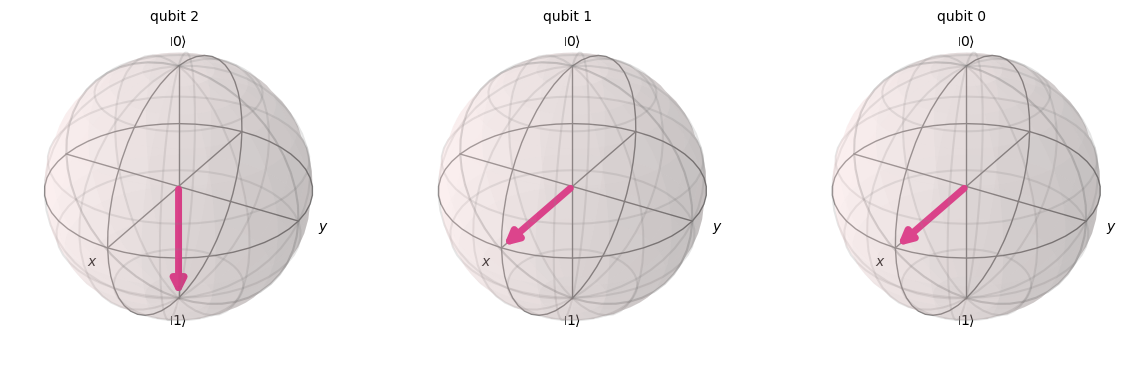

In [20]:
plot_bloch_multivector(qc_state, reverse_bits = True)

## EXERCISE 4:

Given an empty QuantumCircuit object, qc, with three qubits and three classical bits, which one of these code fragments could create this circuit?

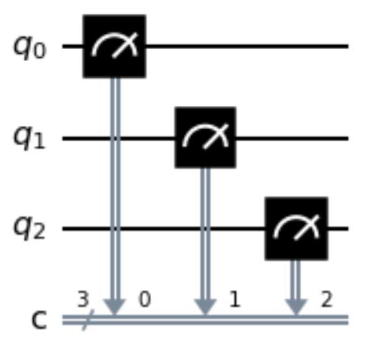

A. qc.measure([0,1,2], [0,1,2]) <br>
B. qc.measure([0,0], [1,1], [2,2]) <br>
C. qc.measure_all() <br>
D. qc.measure(0,1,2) <br>

#### Answer: the correct option is A.

If one tests B and D options the code will give an error since measure() only takes 2 positional arguments but 3 were given. <br> Option C (using measure_all()) creates three new classical registers so the measurement result is stored in the three new ones, leaving the three defined by the user with no information.

## EXERCISE 5:

Which code fragment will produce a maximally entangled, or Bell, state? <br>

A. bell = QuantumCircuit(2)<br>
bell.h(0)<br>
bell.x(1)<br>
bell.cx(0, 1)<br>
B. bell = QuantumCircuit(2)<br>
bell.cx(0, 1)<br>
bell.h(0)<br>
bell.x(1)<br>
C. bell = QuantumCircuit(2)<br>
bell.h(0)<br>
bell.x(1)<br>
bell.cz(0, 1)<br>
D. bell = QuantumCircuit(2)<br>
bell.h(0)<br>
bell.h(0)<br>

#### The correct answer is option A since the final state is $ |\Psi^+ >\frac{1}{\sqrt{2}} (|10> + |01>) $

Option B gives $ |q_1q_0>\frac{1}{\sqrt{2}} (|10> + |11>) $ which is not a Bell state. <br>
Option C gives $ |q_1q_0>\frac{1}{\sqrt{2}} (|10> - |11>) $ which is not a Bell state. <br>
Option D gives $ |q_1q_0>\frac{1}{2} (|00> + |01> +|10> + |11>) $ which is not a Bell state. <br>